In [5]:
from __future__ import annotations

from dataclasses import dataclass
from pathlib import Path
from typing import Dict, Tuple, Optional, List
import numpy as np
import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt
from tqdm import tqdm

from src.hrv_epatch.io.tdms import load_tdms_from_path
from src.hrv_epatch.io.labview import (
    read_labview_rr,
    read_header_datetime_lvm,
)

In [6]:
df_rec = pd.read_parquet(r"E:\Speciale - Results\df_rec.parquet")
df_rec


,recording_uid,patient_id,enrollment_id,recording_id,tdms_path,annotation_path,fs,n_samples,recording_start,recording_end,rec_duration_s
0,P01_R01,1,None,1,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,512.0,97861504,2016-02-22 11:04:14,2016-02-24 16:09:49.750000,191135.750000
1,P01_R02,1,None,2,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,512.0,75110401,2016-02-24 16:15:00,2016-02-26 09:00:00.001953,146700.001953
2,P02_R01,2,None,1,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,512.0,32708992,2016-05-03 13:19:05,2016-05-04 07:03:49.750000,63884.750000
3,P03_R01,3,None,1,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,512.0,87563520,2016-09-05 11:19:32,2016-09-07 10:49:54.500000,171022.500000
4,P03_R02,3,None,2,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,512.0,86426624,2016-09-07 10:50:46,2016-09-09 09:44:08.000000,168802.000000
...,...,...,...,...,...,...,...,...,...,...,...
67,P40_R01,40,None,1,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,512.0,81431808,2018-06-25 13:01:08,2018-06-27 09:11:54.500000,159046.500000
68,P40_R02,40,None,2,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,512.0,39214720,2018-06-27 14:10:07,2018-06-28 11:26:38.250000,76591.250000
69,P41_R01,41,None,1,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,512.0,125687552,2018-09-11 13:22:37,2018-09-14 09:34:00.500000,245483.500000
70,P42_R01,42,None,1,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,512.0,132710144,2018-10-15 11:02:41,2018-10-18 11:02:40.500000,259199.500000


In [7]:

# from src.hrv_epatch.study3.rr_compare import RecordingConfig, process_recording

LVM_ROOT = r"E:\Speciale - Results\LabView_Trimmed_RR-intervals"

df_rec["lvm_file"] = df_rec["recording_uid"].apply(
    lambda uid: Path(LVM_ROOT) / f"{uid}.lvm" if (Path(LVM_ROOT) / f"{uid}.lvm").exists() else None
)
df_rec_with_lvm = df_rec[df_rec["lvm_file"].notnull()]
df_rec_with_lvm

,recording_uid,patient_id,enrollment_id,recording_id,tdms_path,annotation_path,fs,n_samples,recording_start,recording_end,rec_duration_s,lvm_file
0,P01_R01,1,None,1,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,512.0,97861504,2016-02-22 11:04:14,2016-02-24 16:09:49.750000,191135.750000,E:\Speciale - Results\LabView_Trimmed_RR-inter...
1,P01_R02,1,None,2,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,512.0,75110401,2016-02-24 16:15:00,2016-02-26 09:00:00.001953,146700.001953,E:\Speciale - Results\LabView_Trimmed_RR-inter...
2,P02_R01,2,None,1,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,512.0,32708992,2016-05-03 13:19:05,2016-05-04 07:03:49.750000,63884.750000,E:\Speciale - Results\LabView_Trimmed_RR-inter...
3,P03_R01,3,None,1,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,512.0,87563520,2016-09-05 11:19:32,2016-09-07 10:49:54.500000,171022.500000,E:\Speciale - Results\LabView_Trimmed_RR-inter...
4,P03_R02,3,None,2,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,512.0,86426624,2016-09-07 10:50:46,2016-09-09 09:44:08.000000,168802.000000,E:\Speciale - Results\LabView_Trimmed_RR-inter...
5,P04_R01,4,None,1,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,512.0,29145601,2016-09-12 12:50:00,2016-09-13 04:38:45.001953,56925.001953,E:\Speciale - Results\LabView_Trimmed_RR-inter...
6,P05_R01,5,None,1,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,512.0,82460288,2016-10-12 11:05:02,2016-10-14 07:49:17.250000,161055.250000,E:\Speciale - Results\LabView_Trimmed_RR-inter...


In [5]:
from pathlib import Path
import pandas as pd
from src.hrv_epatch.rpeak.rr_compare import run_rr_comparison_from_df

LVM_ROOT = r"E:\Speciale - Results\Final-LabView-Trim-Testset"
aligned_dir = Path(r"E:\Speciale - Results\Final_RR_alignment\aligned_rr")

df_rec = pd.read_parquet(r"E:\Speciale - Results\df_rec.parquet")
df_rec["lvm_file"] = df_rec["recording_uid"].apply(
    lambda uid: Path(LVM_ROOT) / f"{uid}.lvm"
)
df_rec_with_lvm = df_rec[df_rec["lvm_file"].apply(lambda p: p.exists())]

peak_methods_test = [
    "neurokit",
    "pantompkins1985",
    "hamilton2002",
    "zong2003",
    "martinez2004",
    "christov2004",
    "gamboa2008",
    "elgendi2010",
    "engzeemod2012",
    "manikandan2012",
    "khamis2016",
    "kalidas2017",
    "nabian2018",
    "rodrigues2021",
    "emrich2023",
    "promac",
]
peak_methods = [
    "neurokit",
    "pantompkins1985",
    "hamilton2002",
    "nabian2018",
    "elgendi2010",
    "emrich2023",
]

# eventuelt + én eller to ekstra, fx "christov2004", "kalidas2017"


results = []

for m in peak_methods:
    print(f"\n=== Running method: {m} ===")
    try:
        df_metrics_3p = run_rr_comparison_from_df(
            df_index=df_rec_with_lvm,
            methods=[m],
            aligned_dir=aligned_dir,
            patient_filter=[6,7,8,9,10], # 1,2,3,4,5,29
            max_duration_s=None,
        )
        df_metrics_3p["method"] = m
        results.append(df_metrics_3p)
    except Exception as e:
        print(f"Method {m} failed with: {repr(e)}")

if results:
    df_metrics_3p = pd.concat(results, ignore_index=True)
    df_metrics_3p.to_csv(
        r"E:\Speciale - Results\Final_RR_alignment\rr_peak_metrics_P06-07-08-09-10_6methodes.csv",
        index=False,
    )



=== Running method: neurokit ===


RR/peak comparison: 100%|██████████| 10/10 [03:24<00:00, 20.44s/it]



=== Running method: pantompkins1985 ===


RR/peak comparison: 100%|██████████| 10/10 [01:50<00:00, 11.10s/it]



=== Running method: hamilton2002 ===


RR/peak comparison: 100%|██████████| 10/10 [08:51<00:00, 53.15s/it]



=== Running method: nabian2018 ===


RR/peak comparison: 100%|██████████| 10/10 [16:14<00:00, 97.45s/it] 



=== Running method: elgendi2010 ===


RR/peak comparison: 100%|██████████| 10/10 [17:48<00:00, 106.88s/it]



=== Running method: emrich2023 ===


RR/peak comparison: 100%|██████████| 10/10 [18:20<00:00, 110.03s/it]


In [5]:
from pathlib import Path
from src.hrv_epatch.rpeak.rr_compare import run_rr_comparison_from_df

# LVM_ROOT = r"E:\Speciale - Results\LabView_Trimmed_RR-intervals"
LVM_ROOT = r"E:\Speciale - Results\Final-LabView-Raw"

df_rec = pd.read_parquet(r"E:\Speciale - Results\df_rec.parquet")
df_rec["lvm_file"] = df_rec["recording_uid"].apply(
    lambda uid: Path(LVM_ROOT) / f"{uid}.lvm"
)
df_rec_with_lvm = df_rec[df_rec["lvm_file"].apply(lambda p: p.exists())]

methods = ["neurokit", "pantompkins1985", "hamilton2002","elgendi2010", "engzeemod2012", 'vg'] # Methods that cant be used: "biosppy"

aligned_dir = Path(r"E:\Speciale - Results\Final_RR_alignment\aligned_rr")

df_metrics = run_rr_comparison_from_df(
    df_index=df_rec_with_lvm,
    methods=methods,
    aligned_dir=aligned_dir,
    patient_filter=[1,2,5],  # eller None for alle
)
df_metrics.to_csv(r"E:\Speciale - Results\Final_RR_alignment\rr_peak_metrics_p01-05.csv",
                  index=False)


RR/peak comparison:  21%|██        | 5/24 [09:07<34:40, 109.52s/it]


ImportError: NeuroKit error: ecg_findpeaks(): the 'ts2vg' module is required for this method to run. Please install it first (`pip install ts2vg`).

In [ ]:
def run_for_lvm_root(lvm_root, trim_label, patient_filter=None):
    df = df_rec.copy()
    df["lvm_file"] = df["recording_uid"].apply(
        lambda uid: Path(lvm_root) / f"{uid}.lvm"
    )
    df = df[df["lvm_file"].apply(lambda p: p.exists())]

    df_metrics = run_rr_comparison_from_df(
        df_index=df,
        methods=methods,
        aligned_dir=aligned_dir,
        patient_filter=patient_filter,
        trim_label=trim_label,   # hvis din funktion understøtter det,
                                 # ellers kan du bare tilføje kolonnen bagefter
    )
    df_metrics["trim_label"] = trim_label
    return df_metrics

df_raw      = run_for_lvm_root(r"E:\Speciale - Results\Final-LabView-Raw",          "raw",      patient_filter=[1,2,3,4,5,6,7,8,9,10])
df_trim     = run_for_lvm_root(r"E:\Speciale - Results\LabView_Trimmed_RR-intervals","trim",     patient_filter=[1,2,3,4,5,6,7,8,9,10])
df_extreme  = run_for_lvm_root(r"E:\Speciale - Results\Final-LabView-ExtraTrim",    "extreme",  patient_filter=[1,2,3,4,5,6,7,8,9,10])

df_all = pd.concat([df_raw, df_trim, df_extreme], ignore_index=True)
df_all.to_csv(r"E:\Speciale - Results\Final_RR_alignment\rr_peak_metrics_p01-10_all_trims.csv",
              index=False)


In [ ]:
from src.hrv_epatch.rpeak.metrics import compare_labview_versions

def compare_all_trims(uid: str) -> dict:
    no_trim    = Path(r"E:\Speciale - Results\Final-LabView-Raw")    / f"{uid}.lvm"
    trim = Path(r"E:\Speciale - Results\Final-LabView-Trim-Testset")   / f"{uid}.lvm"

    res_no_vs_trim = compare_labview_versions(no_trim, trim,
                                               ref_label="no_trim",
                                               test_label="trim")

    return {"uid": uid,
            "no_vs_table": res_no_vs_trim,}

In [16]:
methods = ["neurokit", "pantompkins1985", "hamilton2002"]

aligned_dir = Path(r"E:\Speciale - Results\RR_alignment\aligned_rr")

df_metrics = run_rr_comparison_from_df(
    df_index=df_rec_with_lvm,      # dit index-df
    methods=methods,
    aligned_dir=aligned_dir,
    patient_filter=[1, 2, 3, 4, 5],   # eller None for alle
)

df_metrics.head()


RR/peak comparison: 100%|██████████| 21/21 [06:36<00:00, 18.86s/it]


,n_common,rr_mae_ms,rr_rmse_ms,rr_corr,mean_hr_ref_bpm,mean_hr_test_bpm,mean_hr_diff_bpm,patient_id,recording_id,algo_id,...,raw_tdms_path,raw_lvm_path,n_peaks_labview_total,n_peaks_python_total,n_peaks_tp,n_peaks_fp,n_peaks_fn,peak_sens,peak_ppv,peak_f1
0,226564,2.019920,25.777972,0.968432,71.355512,71.348508,-0.007004,1,1,neurokit,...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\Speciale - Results\LabView_Trimmed_RR-inter...,226906,227278,226482,406,424,0.998131,0.998211,0.998171
1,53706,43.241695,1865.392451,0.027801,81.809604,80.567371,-1.242232,1,1,pantompkins1985,...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\Speciale - Results\LabView_Trimmed_RR-inter...,226906,203740,13598,189855,213308,0.059928,0.066836,0.063194
2,189804,19.472249,165.362520,0.433946,70.016934,69.971435,-0.045499,1,1,hamilton2002,...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\Speciale - Results\LabView_Trimmed_RR-inter...,226906,217656,74316,143056,152590,0.327519,0.341884,0.334547
3,168042,1.633264,13.935727,0.990005,68.889964,68.900477,0.010514,1,2,neurokit,...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\Speciale - Results\LabView_Trimmed_RR-inter...,168150,168576,168014,176,136,0.999191,0.998954,0.999072
4,73883,21.918727,104.119959,0.426019,63.535156,63.299419,-0.235737,1,2,pantompkins1985,...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\Speciale - Results\LabView_Trimmed_RR-inter...,168150,151775,9607,142137,156910,0.057694,0.063311,0.060372


In [17]:
out_metrics_path = Path(r"E:\Speciale - Results\RR_alignment\rr_peak_metrics_p01-05.csv")
out_metrics_path.parent.mkdir(parents=True, exist_ok=True)
df_metrics.to_csv(out_metrics_path, index=False)
out_metrics_path


WindowsPath('E:/Speciale - Results/RR_alignment/rr_peak_metrics_p01-05.csv')

In [ ]:
# row_p05 = df_rec_with_lvm.query("patient_id == 5 and recording_id == 1").iloc[0]

# cfg_p05 = RecordingConfig(
#     patient_id=int(row_p05["patient_id"]),
#     recording_id=int(row_p05["recording_id"]),
#     tdms_path=Path(row_p05["tdms_path"]),
#     lvm_path=Path(row_p05["lvm_file"]),  # her skal være den LVM du vil bruge som ref
#     fs=float(row_p05["fs"]),
#     # hvis du vil teste en bestemt NeuroKit-metode:
#     algo_id="neurokit",      # eller "pantompkins1985", "hamilton2002", ...
#     trim_label=row_p05.get("trim_label", None) if hasattr(row_p05, "get") else None,
# )


In [ ]:
# aligned_dir = Path(r"E:\Speciale - Results\RR_alignment\aligned_rr_p05")
# aligned_dir.mkdir(parents=True, exist_ok=True)

# aligned_path_p05 = aligned_dir / "P05_R01_neurokit_rr_aligned.csv"

# metrics_p05 = process_recording(
#     cfg_p05,
#     save_aligned_path=aligned_path_p05,
#     delta_range_s=(-2.0, 2.0),
#     delta_step_s=0.05,
#     tol_s=0.15,
# )

# metrics_p05


{'n_common': 166808,
 'rr_mae_ms': 13.007080573173946,
 'rr_rmse_ms': 300.8047790284438,
 'rr_corr': 0.3970517849854414,
 'mean_hr_ref_bpm': 63.16857057151119,
 'mean_hr_test_bpm': 62.45706984428604,
 'mean_hr_diff_bpm': -0.7115007272251503,
 'patient_id': 5,
 'recording_id': 1,
 'algo_id': 'neurokit',
 'trim_label': None,
 'n_rr_labview_total': 171115,
 'n_rr_python_total': 167187,
 'n_rr_matched': 166808,
 'best_delta_s': 0.20000000000000195,
 'tdms_start_epoch': 1476263102.0,
 'labview_first_r_epoch': 1476263170.630399,
 'python_first_r_epoch': 1476263104.0535157,
 'labview_first_r_rel_s': 68.63039898872375,
 'python_first_r_rel_s': 2.053515672683716,
 'first_r_rel_diff_s': -66.57688331604004,
 'raw_tdms_path': 'E:\\ML algoritme tl anfaldsdetektion vha HRV\\ePatch data from Aarhus to Lausanne\\Patients ePatch data\\Patient 5\\recording 1\\Patient 5_1.tdms',
 'raw_lvm_path': 'E:\\Speciale - Results\\LabView_Trimmed_RR-intervals\\P05_R01.lvm',
 'n_peaks_labview_total': 171116,
 'n_pea

In [ ]:
# no_trim    = Path(r"E:\Speciale - Results\LabView_NoTrim_RR-intervals\P05_R01.lvm")
# trim_table = Path(r"E:\Speciale - Results\LabView_Trimmed_RR-intervals\P05_R01.lvm")
# trim_30    = Path(r"E:\Speciale - Results\LabView_ExtraTrim_RR-intervals\P05_R01.lvm")

# res_no_vs_table = compare_labview_versions(
#     no_trim,
#     trim_table,
#     ref_label="no_trim",
#     test_label="trim_table",
# )

# res_no_vs_30 = compare_labview_versions(
#     no_trim,
#     trim_30,
#     ref_label="no_trim",
#     test_label="trim_30min",
# )

# res_table_vs_30 = compare_labview_versions(
#     trim_table,
#     trim_30,
#     ref_label="trim_table",
#     test_label="trim_30min",
# )

# res_no_vs_table, res_no_vs_30, res_table_vs_30


({'n_common': 171093,
  'rr_mae_ms': 0.036902029890176685,
  'rr_rmse_ms': 2.3913794542569593,
  'rr_corr': 0.9999046925021153,
  'mean_hr_ref_bpm': 63.774742924771395,
  'mean_hr_test_bpm': 63.774263795975244,
  'mean_hr_diff_bpm': -0.0004791287961509738,
  'ref_label': 'no_trim',
  'test_label': 'trim_table',
  'n_peaks_ref_total': 171210,
  'n_peaks_test_total': 171116,
  'n_peaks_tp': 171066,
  'n_peaks_fp': 50,
  'n_peaks_fn': 53,
  'peak_sens': 0.9996902740198341,
  'peak_ppv': 0.9997078005563478,
  'peak_f1': 0.999699037211273,
  'best_delta_s': 1.7763568394002505e-15,
  'lvm_ref_path': 'E:\\Speciale - Results\\LabView_NoTrim_RR-intervals\\P05_R01.lvm',
  'lvm_test_path': 'E:\\Speciale - Results\\LabView_Trimmed_RR-intervals\\P05_R01.lvm'},
 {'n_common': 164580,
  'rr_mae_ms': 0.0011313950662291965,
  'rr_rmse_ms': 0.040614670630322036,
  'rr_corr': 0.9999999615548911,
  'mean_hr_ref_bpm': 63.067963233816606,
  'mean_hr_test_bpm': 63.06802284623718,
  'mean_hr_diff_bpm': 5.96124

In [ ]:

# cfg = RecordingConfig(
#     patient_id=1,
#     recording_id=1,
#     tdms_path=Path(r"E:\ML algoritme tl anfaldsdetektion vha HRV\ePatch data from Aarhus to Lausanne\Patients ePatch data\Patient 1\recording 1\Patient 1_1.tdms"),
#     lvm_path=Path(r"E:\Speciale - Results\LabView_Trimmed_RR-intervals\P01_R01.lvm"),
#     fs=512.0,
# )

# aligned_dir = Path(r"E:\Speciale - Results\Test1")
# aligned_dir.mkdir(parents=True, exist_ok=True)

# aligned_out = aligned_dir / f"p{cfg.patient_id:02d}_r{cfg.recording_id:02d}_rr_aligned.csv"

# metrics = process_recording(
#     cfg,
#     save_aligned_path=aligned_out,
#     delta_range_s=(-2.0, 2.0),
#     delta_step_s=0.05,
#     tol_s=0.15,
# )

# metrics


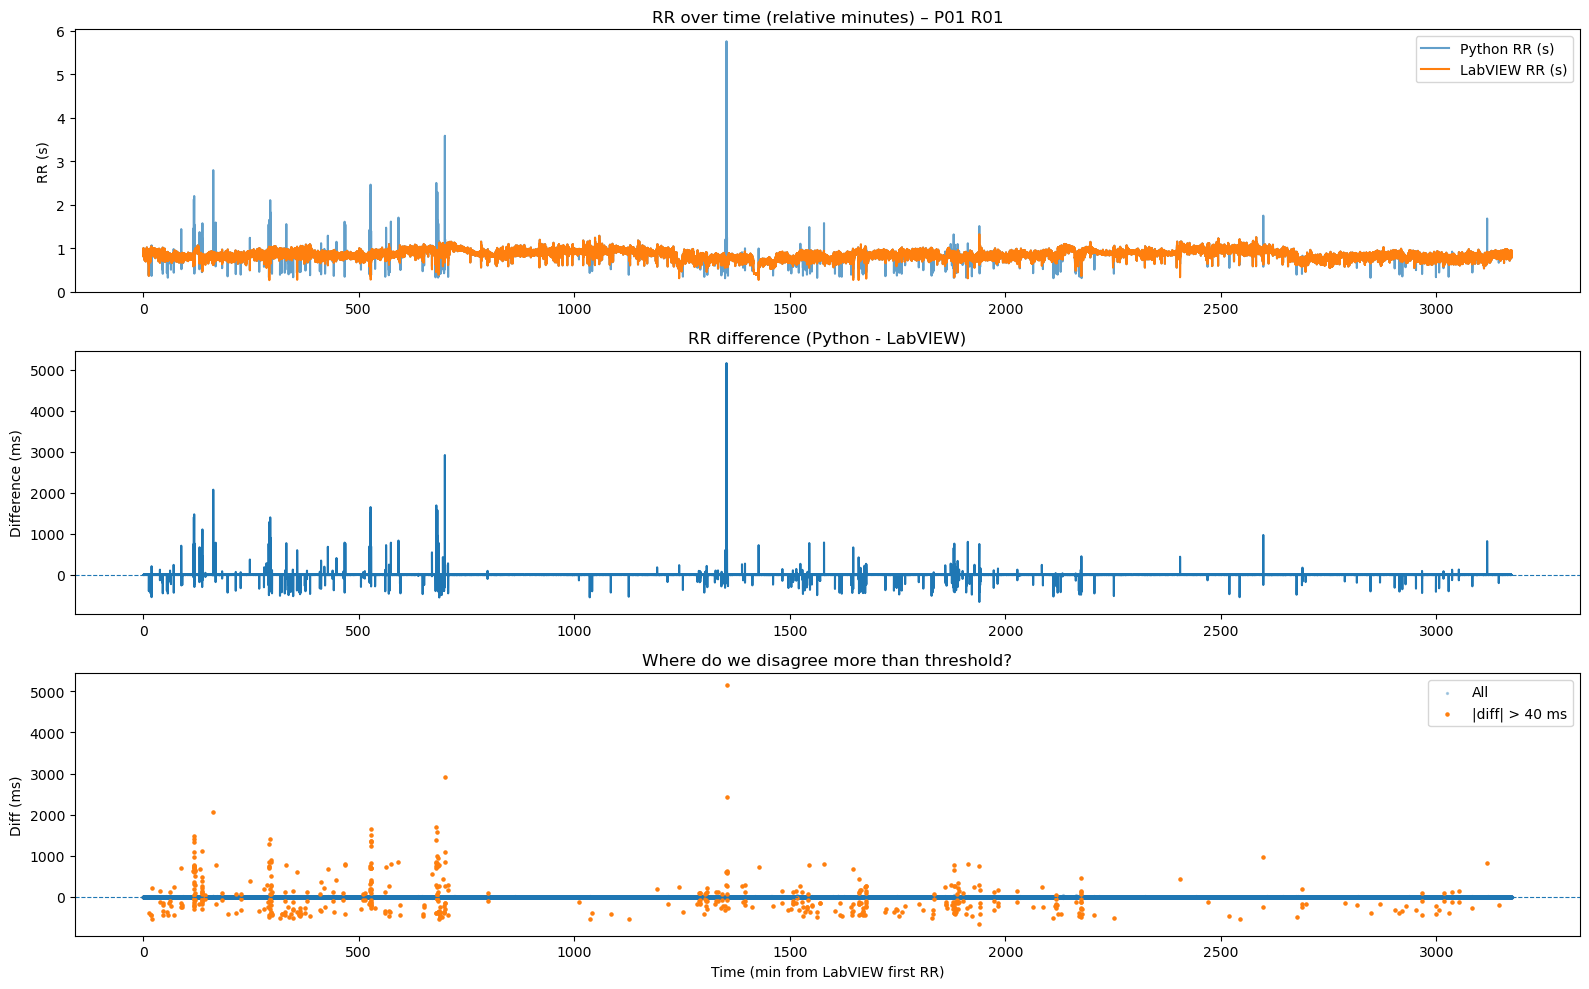

In [ ]:
# # 1) Reproducer alignment-data for en given recording
# sig, meta = load_tdms_from_path(
#     cfg.tdms_path,
#     channel_hint=cfg.channel_hint,
#     prefer_tz=cfg.tz,
# )
# ecg = np.asarray(sig)[:]
# fs = cfg.fs
# t0_tdms_dt = meta.start_time

# # Python peaks + RR
# r_idx_py = detect_rpeaks_python(ecg, fs)
# t_R_py, RR_py = rpeaks_to_times_and_rr(r_idx_py, fs, t0_tdms_dt)

# # LabVIEW RR + tider
# rr_lv = read_labview_rr(str(cfg.lvm_path))
# t0_lv_dt = read_header_datetime_lvm(str(cfg.lvm_path))
# t_R_lv, RR_lv = reconstruct_labview_r_times(rr_lv, t0_lv_dt)

# # Delta fra vores RR-alignment (brug gerne metrics fra process_recording)
# best_delta = metrics["best_delta_s"]

# # 2) Plot summary
# fig = plot_alignment_summary(
#     t_R_lv,
#     RR_lv,
#     t_R_py,
#     RR_py,
#     best_delta_s=best_delta,
#     tol_s=0.15,
#     big_thresh_ms=40.0,
#     title_suffix=f" – P{cfg.patient_id:02d} R{cfg.recording_id:02d}",
# )
# plt.show()


In [ ]:
# # Eksempel i notebook – IKKE inde i modulet

# sig, meta = load_tdms_from_path(
#     cfg.tdms_path,
#     channel_hint=cfg.channel_hint,
#     prefer_tz=cfg.tz,
# )
# ecg = np.asarray(sig)[:]
# fs = cfg.fs
# t0_tdms_dt = meta.start_time

# # Python peaks + RR
# r_idx_py = detect_rpeaks_python(ecg, fs)
# t_R_py, RR_py = rpeaks_to_times_and_rr(r_idx_py, fs, t0_tdms_dt)

# # LabVIEW RR + tider
# rr_lv = read_labview_rr(str(cfg.lvm_path))
# t0_lv_dt = read_header_datetime_lvm(str(cfg.lvm_path))
# t_R_lv, RR_lv = reconstruct_labview_r_times(rr_lv, t0_lv_dt)

# # Find samme best_delta som i process_recording
# best_delta, rr_lv_m, rr_py_m = find_best_delta(
#     t_R_lv, RR_lv, t_R_py, RR_py,
#     delta_range_s=(-2.0, 2.0),
#     delta_step_s=0.05,
#     tol_s=0.15,
# )


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# def plot_rr_alignment(t_R_lv, RR_lv, t_R_py, RR_py, delta_s, tol_s=0.15):
#     rr_lv_m, rr_py_m = match_rr_series_time_based(
#         t_R_lv, RR_lv, t_R_py, RR_py,
#         delta_s=delta_s,
#         tol_s=tol_s,
#     )

#     # Tidsakse: brug LabVIEW starttider for de matchede intervaller
#     t = t_R_lv[:len(rr_lv_m)]
#     t_rel_min = (t - t[0]) / 60.0  # rel. minutter fra start

#     diff_ms = (rr_py_m - rr_lv_m) * 1000.0

#     fig, axs = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

#     axs[0].plot(t_rel_min, rr_py_m, label="Python RR (s)", alpha=0.7)
#     axs[0].plot(t_rel_min, rr_lv_m, label="LabVIEW RR (s)")
#     axs[0].set_ylabel("RR (s)")
#     axs[0].set_title("RR over time (relative minutes)")
#     axs[0].legend()

#     axs[1].plot(t_rel_min, diff_ms)
#     axs[1].axhline(0, linestyle="--")
#     axs[1].set_ylabel("Difference (ms)")
#     axs[1].set_xlabel("Time (min from LabVIEW first R)")
#     axs[1].set_title("RR difference (Python - LabVIEW)")
#     plt.tight_layout()

#     return fig, (axs, rr_lv_m, rr_py_m, t_rel_min, diff_ms)


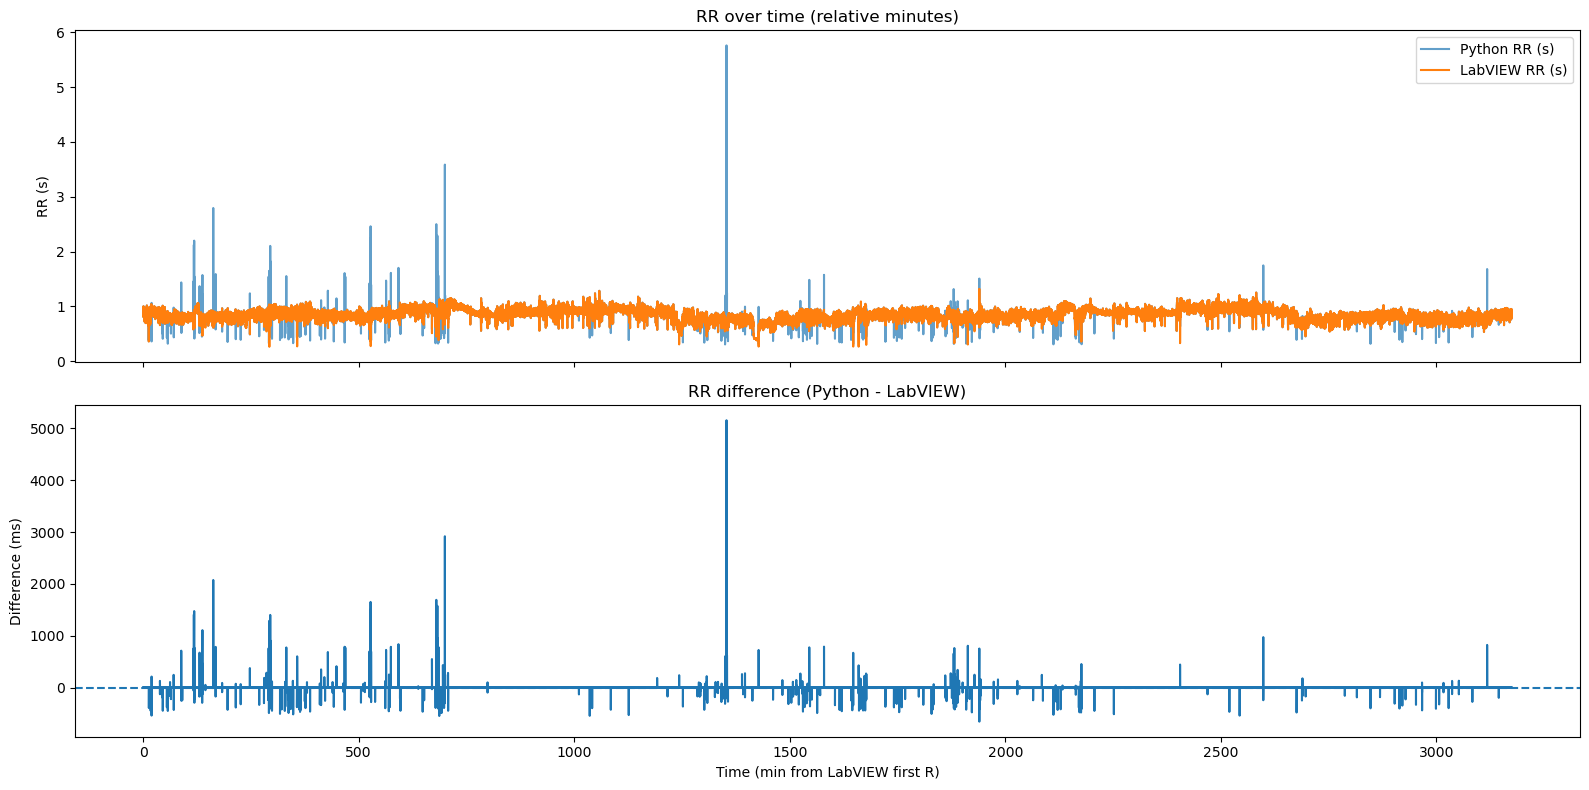

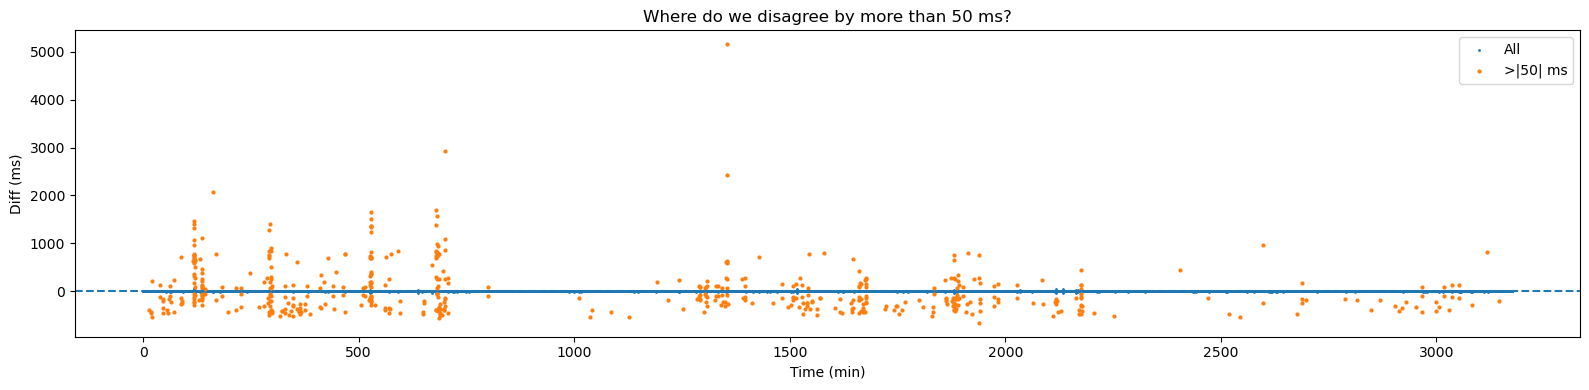

In [ ]:
# fig, (axs, rr_lv_m, rr_py_m, t_rel_min, diff_ms) = plot_rr_alignment(
#     t_R_lv, RR_lv, t_R_py, RR_py, best_delta
# )
# plt.show()

# large_err_mask = np.abs(diff_ms) > 50.0  # fx > 50 ms forskel

# plt.figure(figsize=(16, 4))
# plt.scatter(t_rel_min, diff_ms, s=1, label="All")
# plt.scatter(t_rel_min[large_err_mask], diff_ms[large_err_mask], s=4, label=">|50| ms")
# plt.axhline(0, linestyle="--")
# plt.xlabel("Time (min)")
# plt.ylabel("Diff (ms)")
# plt.legend()
# plt.title("Where do we disagree by more than 50 ms?")
# plt.tight_layout()
# plt.show()


In [ ]:
# print("min RR_py (s) =", RR_py.min())
# print("max RR_py (s) =", RR_py.max())

# # find hvor mange RR_py > 10 s
# print("RR_py > 10 s:", np.sum(RR_py > 10))

# # find største RR_py
# print("largest 10 RR_py (s):", np.sort(RR_py)[-10:])


min RR_py (s) = 0.302734375
max RR_py (s) = 13.02734375
RR_py > 10 s: 1
largest 10 RR_py (s): [ 3.90429688  4.25976562  4.33984375  4.40039062  5.45507812  5.70117188
  5.75976562  6.19921875  7.20703125 13.02734375]


In [42]:
import pandas as pd

df = pd.read_csv(r"E:\Speciale - Results\Test1\p01_r01_rr_aligned.csv")
print(df["RR_python_s"].min(), df["RR_python_s"].max())
print(df["RR_python_s"].head())


0.306640625 5.759765625
0    0.861328
1    0.871094
2    0.859375
3    0.865234
4    0.849609
Name: RR_python_s, dtype: float64


In [16]:
from __future__ import annotations
from pathlib import Path
from typing import Dict, Tuple
import numpy as np

from src.hrv_epatch.rpeak.rr_compare import (
    compute_rr_metrics,
    compute_peak_metrics,
    match_rpeaks_time_based_global,
    find_best_delta,
)
from src.hrv_epatch.io.labview import read_labview_rr, read_header_datetime_lvm


def _rr_to_peak_times_abs(rr_s: np.ndarray, lvm_path: Path) -> np.ndarray:
    rr_s = np.asarray(rr_s, float).ravel()
    t_rel = np.cumsum(np.insert(rr_s, 0, 0.0))

    t0_dt = read_header_datetime_lvm(str(lvm_path))
    if t0_dt is None:
        return t_rel

    return float(t0_dt.timestamp()) + t_rel


def compare_labview_versions(
    lvm_ref_path: str | Path,
    lvm_test_path: str | Path,
    ref_label: str = "ref",
    test_label: str = "test",
    tol_peak_s: float = 0.04,   # brug gerne samme som din RR tol eller 0.10–0.15 her
    delta_range_s: Tuple[float, float] = (-2.0, 2.0),
    delta_step_s: float = 0.05,
    tol_rr_s: float = 0.04,
) -> Dict[str, float]:

    lvm_ref_path = Path(lvm_ref_path)
    lvm_test_path = Path(lvm_test_path)

    # 1) RR
    rr_ref = read_labview_rr(str(lvm_ref_path))
    rr_test = read_labview_rr(str(lvm_test_path))
    if rr_ref.size == 0 or rr_test.size == 0:
        raise ValueError("En af LVM-filerne indeholder ingen RR-intervaller.")

    # 2) Peaks (rekonstrueret fra RR)
    t_ref = _rr_to_peak_times_abs(rr_ref, lvm_ref_path)
    t_test = _rr_to_peak_times_abs(rr_test, lvm_test_path)

    # 3) Find best_delta via RR-match
    #    (RR-interval i index i er mellem peak i og i+1)
    rr_ref_full = np.diff(t_ref)
    rr_test_full = np.diff(t_test)

    best_delta, rr_ref_m, rr_test_m = find_best_delta(
        t_R_lv=t_ref[:-1],
        RR_lv=rr_ref_full,
        t_R_py=t_test[:-1],
        RR_py=rr_test_full,
        delta_range_s=delta_range_s,
        delta_step_s=delta_step_s,
        tol_s=tol_rr_s,
    )

    rr_metrics = compute_rr_metrics(rr_ref=rr_ref_m, rr_test=rr_test_m)

    # -----------------------------
    # 4) Peak-metrics kun i fælles område
    # -----------------------------
    # Shift test-peaks til ref-tidsakse
    t_test_shift = t_test + best_delta

    # Definér fælles overlap i tid EFTER shift
    overlap_start = max(t_ref[0], t_test_shift[0])
    overlap_end   = min(t_ref[-1], t_test_shift[-1])
    if overlap_end <= overlap_start:
        raise ValueError("Ingen overlappende tidsinterval efter best_delta-shift.")

    # Begræns begge peakserier til overlap
    ref_mask = (t_ref >= overlap_start) & (t_ref <= overlap_end)
    tst_mask = (t_test_shift >= overlap_start) & (t_test_shift <= overlap_end)

    t_ref_ov = t_ref[ref_mask]
    t_tst_ov = t_test_shift[tst_mask]  # allerede shifted

    # Match peaks: nu bruger vi delta=0 fordi test allerede er shifted
    tp_ref_idx, tp_test_idx, fn_ref_idx, fp_test_idx = match_rpeaks_time_based_global(
        t_peaks_ref=t_ref_ov,
        t_peaks_test=t_tst_ov,
        delta_s=0.0,
        tol_s=tol_peak_s,
    )

    peak_metrics = compute_peak_metrics(
        tp=len(tp_ref_idx),
        fp=len(fp_test_idx),
        fn=len(fn_ref_idx),
    )

    out: Dict[str, float] = {}
    out.update(rr_metrics)
    out.update({
        "ref_label": ref_label,
        "test_label": test_label,
        "best_delta_s": float(best_delta),

        # Peak counts i overlap (ikke hele filen)
        "n_peaks_ref_total": int(t_ref_ov.size),
        "n_peaks_test_total": int(t_tst_ov.size),
        "n_peaks_tp": int(peak_metrics["tp"]),
        "n_peaks_fp": int(peak_metrics["fp"]),
        "n_peaks_fn": int(peak_metrics["fn"]),
        "peak_sens": float(peak_metrics["sens"]),
        "peak_ppv": float(peak_metrics["ppv"]),
        "peak_f1": float(peak_metrics["f1"]),

        "overlap_start": float(overlap_start),
        "overlap_end": float(overlap_end),
        "tol_peak_s_used": float(tol_peak_s),
        "lvm_ref_path": str(lvm_ref_path),
        "lvm_test_path": str(lvm_test_path),
    })
    return out


In [17]:
import pandas as pd
from pathlib import Path

def compare_all_trims(uids: list[str]) -> pd.DataFrame:
    rows = []
    for uid in uids:
        no_trim = Path(r"E:\Speciale - Results\Final-LabView-Raw") / f"{uid}.lvm"
        trim    = Path(r"E:\Speciale - Results\Final-LabView-Trim-Testset") / f"{uid}.lvm"

        if not no_trim.exists() or not trim.exists():
            print(f"[WARN] Mangler LVM-fil(er) for {uid}, skipper.")
            continue

        res = compare_labview_versions(
            no_trim,
            trim,
            ref_label="no_trim",
            test_label="trim",
            tol_peak_s=0.15,  # start her
        )

        res["uid"] = uid
        rows.append(res)

    return pd.DataFrame(rows)


In [21]:
uids = df_rec["recording_uid"].tolist()  # eller en subset
# uids = ["P02_R01"]  # eller flere
df_lv_compare = compare_all_trims(uids)
df_lv_compare.to_csv(
    r"E:\Speciale - Results\study3\Final-LabView-TrimCheck.csv",
    # r"E:\Speciale - Results\study3\LabView-TrimCheck.csv",
    index=False
)
df_lv_compare

,n_common,rr_mae_ms,rr_rmse_ms,rr_corr,mean_hr_ref_bpm,mean_hr_test_bpm,mean_hr_diff_bpm,ref_label,test_label,best_delta_s,...,n_peaks_fn,peak_sens,peak_ppv,peak_f1,overlap_start,overlap_end,tol_peak_s_used,lvm_ref_path,lvm_test_path,uid
0,226866,0.000276,0.017207,1.000000,71.372715,71.372714,-3.466370e-07,no_trim,trim,1.776357e-15,...,2,0.999991,1.000000,0.999996,1.456136e+09,1.456326e+09,0.15,E:\Speciale - Results\Final-LabView-Raw\P01_R0...,E:\Speciale - Results\Final-LabView-Trim-Tests...,P01_R01
1,167718,0.000165,0.009575,1.000000,68.887293,68.887293,1.589779e-07,no_trim,trim,1.776357e-15,...,0,1.000000,1.000000,1.000000,1.456327e+09,1.456473e+09,0.15,E:\Speciale - Results\Final-LabView-Raw\P01_R0...,E:\Speciale - Results\Final-LabView-Trim-Tests...,P01_R02
2,91548,0.210221,0.592328,0.999992,86.169433,86.169435,1.844142e-06,no_trim,trim,1.776357e-15,...,1,0.999989,1.000000,0.999995,1.462274e+09,1.462338e+09,0.15,E:\Speciale - Results\Final-LabView-Raw\P02_R0...,E:\Speciale - Results\Final-LabView-Trim-Tests...,P02_R01
3,198179,0.000446,0.025397,1.000000,69.600662,69.600661,-4.407806e-07,no_trim,trim,1.776357e-15,...,1,0.999995,1.000000,0.999997,1.473067e+09,1.473238e+09,0.15,E:\Speciale - Results\Final-LabView-Raw\P03_R0...,E:\Speciale - Results\Final-LabView-Trim-Tests...,P03_R01
4,194835,0.000079,0.003449,1.000000,69.323005,69.323006,6.252148e-07,no_trim,trim,1.776357e-15,...,1,0.999995,1.000000,0.999997,1.473238e+09,1.473407e+09,0.15,E:\Speciale - Results\Final-LabView-Raw\P03_R0...,E:\Speciale - Results\Final-LabView-Trim-Tests...,P03_R02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,173329,0.001023,0.042048,1.000000,65.532424,65.532423,-5.676815e-07,no_trim,trim,1.776357e-15,...,1,0.999994,1.000000,0.999997,1.529925e+09,1.530083e+09,0.15,E:\Speciale - Results\Final-LabView-Raw\P40_R0...,E:\Speciale - Results\Final-LabView-Trim-Tests...,P40_R01
68,82268,0.000418,0.027101,1.000000,67.225024,67.225024,-2.973014e-07,no_trim,trim,1.776357e-15,...,1,0.999988,1.000000,0.999994,1.530102e+09,1.530176e+09,0.15,E:\Speciale - Results\Final-LabView-Raw\P40_R0...,E:\Speciale - Results\Final-LabView-Trim-Tests...,P40_R02
69,325155,0.008563,0.120113,0.999999,79.717914,79.717914,1.710901e-07,no_trim,trim,1.776357e-15,...,0,1.000000,1.000000,1.000000,1.536666e+09,1.536910e+09,0.15,E:\Speciale - Results\Final-LabView-Raw\P41_R0...,E:\Speciale - Results\Final-LabView-Trim-Tests...,P41_R01
70,330166,0.002150,0.055339,1.000000,76.515819,76.515819,6.468471e-08,no_trim,trim,1.776357e-15,...,0,1.000000,1.000000,1.000000,1.539594e+09,1.539853e+09,0.15,E:\Speciale - Results\Final-LabView-Raw\P42_R0...,E:\Speciale - Results\Final-LabView-Trim-Tests...,P42_R01


In [19]:
df_lv_compare.to_csv(r"E:\Speciale - Results\study3\Final-LabView-TrimCheck.csv", index=False)

In [4]:
# Load df_lv_compare
df_lv_compare = pd.read_csv(r"E:\Speciale - Results\study3\Final-LabView-TrimCheck.csv")
df_lv_compare.columns.tolist()

['n_common',
 'rr_mae_ms',
 'rr_rmse_ms',
 'rr_corr',
 'mean_hr_ref_bpm',
 'mean_hr_test_bpm',
 'mean_hr_diff_bpm',
 'ref_label',
 'test_label',
 'best_delta_s',
 'n_peaks_ref_total',
 'n_peaks_test_total',
 'n_peaks_tp',
 'n_peaks_fp',
 'n_peaks_fn',
 'peak_sens',
 'peak_ppv',
 'peak_f1',
 'overlap_start',
 'overlap_end',
 'tol_peak_s_used',
 'lvm_ref_path',
 'lvm_test_path',
 'uid']

In [26]:
summary = (
    df_lv_compare
    .agg({
        "rr_corr": ["median", "min", "max"],
        "rr_mae_ms": ["median", "min", "max"],
        "rr_rmse_ms": ["median", "min", "max"],
        "peak_f1": ["median", "min", "max"],
        "n_peaks_fp": ["median", "max"],
        "n_peaks_fn": ["median", "max"],
    })
    .T
)

summary


,median,min,max
rr_corr,1.000000,0.976146,1.000000
rr_mae_ms,0.001032,0.000024,1.785382
rr_rmse_ms,0.041408,0.000249,21.979221
peak_f1,0.999997,0.998546,1.000000
n_peaks_fp,0.000000,NaN,221.000000
n_peaks_fn,1.000000,NaN,222.000000


In [23]:
summary.round({
    "median": 4,
    "min": 4,
    "max": 4
})


,median,min,max
rr_corr,1.0000,0.9761,1.0000
rr_mae_ms,0.0010,0.0000,1.7854
rr_rmse_ms,0.0414,0.0002,21.9792
peak_f1,1.0000,0.9985,1.0000
n_peaks_fp,0.0000,NaN,221.0000
n_peaks_fn,1.0000,NaN,222.0000
